In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [ ]:
# Examples of tensors (scalars)
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

In [ ]:
# Rank/Degree
rank1_tensor = tf.Variable(["Test", "ok", "m"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

In [ ]:
tf.rank(rank2_tensor) #n numpy=2 is the number of rank

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
# Shape of tensors
rank2_tensor.shape
# rank1_tensor.shape

TensorShape([2, 2])

In [ ]:
# Changing shape
tensor1 = tf.ones([1, 2, 3]) # tf.ones() creates a shape [1,2,3] tensor full of ones
print(tensor1)
tensor2 = tf.reshape(tensor1, [2,3,1]) # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1]) # -1 tells the tensor to calculate the size of the dimension in that place and it will reshape the tensor to [3,2]

# THE NUMBER OF ELEMENTS IN THE RESHAPED TENSOR MUST MATCH THE NUMBER IN THE ORIGINAL

# shape from tensor1 1 - one interior list, 2 - two lists inside in that interior list, 3- each of those lists have three elements

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [ ]:
# Evaluation and sessions
# with tf.Session() as sess: # creates a session using the default graph
#  tensor.eval() # tensor will of course be the name of your tensor

In [ ]:
t = tf.zeros([5,5,5,5])
print(t)
t = tf.reshape(t, [125, -1])

NameError: ignored

<h1> Core learning algorithms <h1>

<h3>Linear regressions<h3>

In [1]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x  

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np # working with arrays
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc #
import tensorflow as tf

In [ ]:
# load dataset titanic
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain.head())
y_train = dftrain.pop('survived') # pop removes
x_eval = dfeval.pop('survived')

print(dftrain.head())

print(y_train)
print(dftrain.loc[0], y_train.loc[0]) # locating first row

# our prediction/our label will be 'survived'

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0     

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape # wtihout () because of tuple

(627, 9)

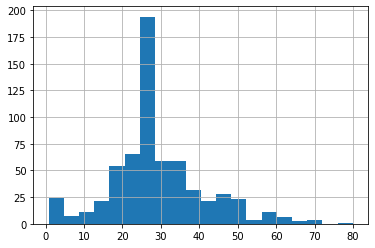

In [ ]:
dftrain.age.hist(bins=20)

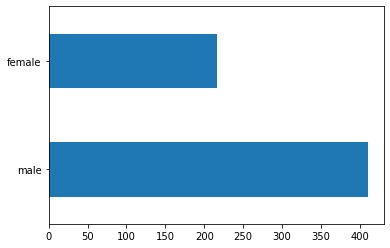

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

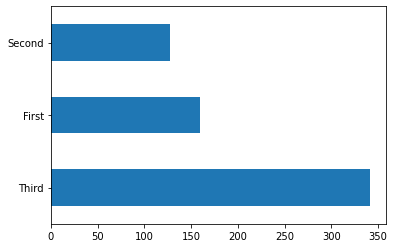

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '%survive')

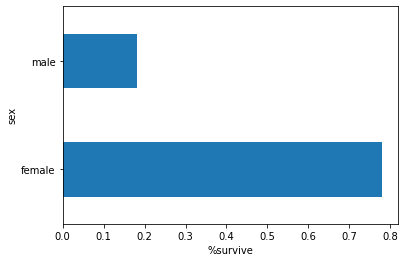

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind="barh").set_xlabel('%survive')

In [ ]:
dfeval.shape # testing data

(264, 9)

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # pop removes
x_eval = dfeval.pop('survived')


CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = [] # created columns in order to fit to linear estimator or linear model to make predictions
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) #it's going to create a column in form like numpy array 
  # which have feature name and all the driffrent vocabulary associated with it
# we need this so that we can create our model using those diffrent columns, cause the model need to know every entries and needs to know what is categorical and what numeric column
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32)) # here you only have to give the name of the column and datatype

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
dftrain['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

<h2> Creating model <h2>

In [ ]:
# creating input function

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32): # shuffle - are we goning to shuffle our data and mix it up?
  def input_function(): # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # create tf.data.Dataset object with data and its label 
    if shuffle:
      ds = ds.shuffle(1000) # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for number of epochs
    return ds # return a batch of dataset
  return input_function # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train) # here we will call the input_function that was returned to us to get a dataset oobject we can feed to the model
eval_input_fn = make_input_fn(dfeval, x_eval, num_epochs=1, shuffle=False)

<h3> We are going to use a linear estimator to utilize the linear regression algorithm <h3>

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) # linear_est is the name of the model we created
# We create linear estimator by passing the feature column we created earlier
# ESTIMATORS - just basic implementations of algorithms in TensorFlow

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpa3pv2jzo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


<h3> Training the model <h3>

In [ ]:
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data

clear_output() # clears console output
print(result['accuracy']) # the result variable is simply a dict of stats about our model
print(result)

0.77272725
{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.8297826, 'auc_precision_recall': 0.7931422, 'average_loss': 0.47761115, 'label/mean': 0.375, 'loss': 0.46945482, 'precision': 0.7241379, 'prediction/mean': 0.35622516, 'recall': 0.6363636, 'global_step': 200}


<h4> If we want to actually check and get predictions from the model and see what those actual predictions are, what we can do is use a method called DOT PREDICT <h4>

In [ ]:
result = list(linear_est.predict(eval_input_fn)) # we converting into the list becasue we're going to loop through it
print(result)

# what we get is a list of all of these different dictionaries that represent each prediction

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa3pv2jzo/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-2.5363696], dtype=float32), 'logistic': array([0.07334751], dtype=float32), 'probabilities': array([0.92665243, 0.07334754], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.91598094], dtype=float32), 'logistic': array([0.2857775], dtype=float32), 'probabilities': array([0.7142225, 0.2857775], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.7446263], dtype=float32), 'logistic': array([0.67800665], dtype=float32), 'probabilities': array([0.321993

In [ ]:
print(dfeval.loc[0])
print(x_eval.loc[0])
print(result[0]['probabilities'][1]) # chance of survive

# Results shows us that with passenger 0 (the first one) with his data, he/she has 0 or 1 chance of survive (which shows us x_eval)
# and the last parameter is probabilities of survive
# you can put other number of other passangers and see that because the model isn't perfect there could be situations like
# parameters of passengers that is more likely to die, seeing the number that he/she is dead, but the probability of survive is 75%

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
0.07334754


In [ ]:
print(dfeval.loc[0])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object


<h2> CLASSIFICATION <H2>
<h2> <h2>
<h4>Dataset - Iris<h4>


In [1]:
%tensorflow_version 2.x

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd

In [3]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Let's define some constants to help us later on

In [4]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names = CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header = 0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into pandas dataframe

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [5]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
# We can pop the species column off and use that as our label (deleting a column)
train_y = train.pop("Species")
test_y = test.pop("Species")
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [8]:
train.shape # we hace 120 entries with 4 features

(120, 4)

<h4>Input function<h4>

In [7]:
def input_fn(features, labels, training=True, batch_size=256):
  # Convert the inputs to a Dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  # Shuffle and repeat if you are in training mode
  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [8]:
# Creating feature columns
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


<h4>Building the model<h4>

<h5>For classification tasks there are variety of different estimators/models that we can pick from. For example:
- DNNClassifier (Deep Neural Network)
- LinearClassifier.
The best option is DNN because we may not be able to find a linear coorespondence in our data<h5>

In [9]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30,10],
    # The model must choose between 3 classes
    n_classes=3
)
# hidden layers are layers between input layer and output layer

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpiykedc_9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


<h3>Training the model<h3>

In [10]:
classifier.train(
    input_fn = lambda: input_fn(train, train_y, training=True), # lambda allows you to define function in one line
    steps=5000
)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpiykedc_9/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.9183554, step = 0
INFO:tensorflow:global_step/sec: 192.578
INFO:tensorflow:loss = 0.77809227, step = 100 (0.521 sec)
INFO:tensorflow:global_step/sec: 207.223
INFO:tensorflow:loss = 0.7467097, step = 200 (0.485 sec)
INFO:tensorflow:global_step/se

<h3>Looking up we want 'Loss' to be the smallest, so when it is 0.52 it's pretty bad<h3>

In [11]:
# Evaluation of the model
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-03-13T16:53:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpiykedc_9/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.61154s
INFO:tensorflow:Finished evaluation at 2022-03-13-16:53:08
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, average_loss = 0.4302777, global_step = 5000, loss = 0.4302777
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpiykedc_9/model.ckpt-5000

Test set accuracy: 0.933



<h2> Predictions <h2>

<h4> Poniższa funkcja daje możliwość wpisania długości i szerokości petal i sepal, na podstawie których nastąpi predykcja w jakiej klasie znajdować się może zadany irys z parametrami <h4>

In [12]:
1def input_fn(features, batch_size=256):
  # Convert the inputs to a Dataset without labels
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict= {}

print("Please type numeric values as prompted.")
for feature in features:
  valid=True
  while valid:
    val = input(feature + ": ") # for each feature we're waiting for valid response
    if not val.isdigit(): valid = False
  
  predict [feature] = [float(val)] # and add that response to dictonairy

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
  print(pred_dict)
  class_id = pred_dict["class_ids"][0]
  probability = pred_dict["probabilities"][class_id]

  print("Prediction is '{}' ({:.1f}%".format(
      SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength: 5.9
SepalWidth: 3.0
PetalLength: 4.2
PetalWidth: .5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpiykedc_9/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-2.3457627, -0.5965707, -1.0710125], dtype=float32), 'probabilities': array([0.0968264 , 0.55674744, 0.34642622], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is 'Versicolor' (55.7%


98,2% is the chance that this is predictions

In [28]:
# Here is some example input and expected classes you can try above
expected = ["Satosa", "Versicolor", "Virginica"]
predict_x = {
    "SepalLength": [5.1, 5.9, 6.9],
    "SepalWidth": [3.3, 3.0, 3.1],
    "PetalLength": [1.7, 4.2, 5.4],
    "PetalWodth": [0.5, 1.5, 2.1],
}



{'SepalLength': [5.1, 5.9, 6.9], 'SepalWidth': [3.3, 3.0, 3.1], 'PetalLength': [1.7, 4.2, 5.4], 'PetalWodth': [0.5, 1.5, 2.1]}


<h2> CLUSTERING <h2>
<h4> opis w zeszycie <h4>

<h2> HIDDEN MARKOV MODEL <H2>

In [13]:
%tensorflow_version 2.x 

In [15]:
import tensorflow_probability as tfp # We are using a different module from tensorflow this time
import tensorflow as tf 

In [17]:
 tfd = tfp.distributions # makig a shortcut or later on
 initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) # Refer to the first day which has 80% chance of being cold
 transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                           [0.2, 0.8]]) # refer to what can followed the next day
 observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.]) # refer to mean and standard deviation about temperature

 # the loc argument represents the mean and the scale is the standard devitation                

<h4> We've now created distribution variables to model our system and it's time to create the hidden markov model <h4>

In [18]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7
)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.
<br><br>
<br>To get the <b>expected temperatures<b> on each day we can do the following<br>

In [21]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

# ouput below: these are temperatures for the next 7 days

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
